In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans


In [5]:
image_path = "../output_videos/cropped_imagge.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

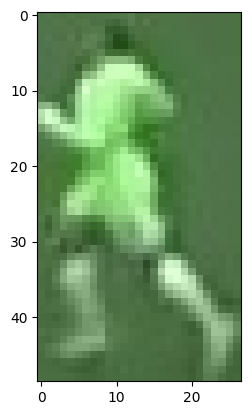

In [6]:
plt.imshow(image)
plt.show()

# take the top half of the image 

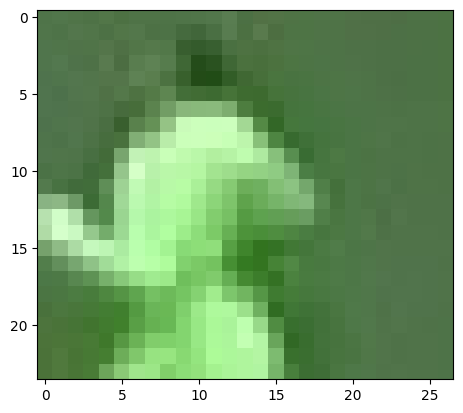

In [9]:
top_half_img = image[0:int(image.shape[0]/2),:]
plt.imshow(top_half_img)
plt.show()

# Cluster the image into two clusters

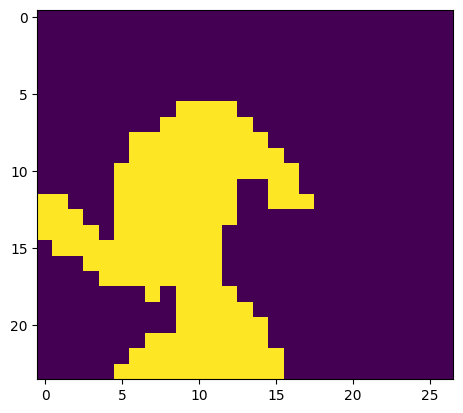

In [17]:
# reshape the image into 2D array
image_2D  = top_half_img.reshape(-1,3)

# preform k-means
kmeans = KMeans(n_clusters=2,random_state=1).fit(image_2D)
# get the cluster labels
labels = kmeans.labels_

# reshape it agian to original image shape

clustered_img = labels.reshape(top_half_img.shape[0],top_half_img.shape[1])

#diaplay_clustered_image
plt.imshow(clustered_img)
plt.show()

In [18]:
corner_clusters = [clustered_img[0,0],clustered_img[0,-1],clustered_img[-1,0],clustered_img[-1,-1]]
non_player_cluster = max(set(corner_clusters),key=corner_clusters.count)

In [22]:
player_cluster = 1- non_player_cluster
kmeans.cluster_centers_[player_cluster]

array([160.34591195, 225.20754717, 144.49685535])